# Programación y Estadística con R

**Lenguaje de programación:** R

**Equipo:** 11

**Integrantes:**

Ximena Ávila Villagómez

Ana Katherine Cuevas Flores

Félix Alberto Nieto García

Daniel Gómez Avín

Alejandro De Fuentes Martínez


**Resumen:**

El trabajo es sobre el análisis de datos de partido de fútbol de la selección española.  En el proceso se utilizaron temas, librerías y funciones vistas en las ocho clases del módulo “Programación y Estadística con R”. 

### Librerias utilizadas

In [4]:
library(ggplot2)        #Para graficación de datoa
library(dplyr)          #Para la manipulación y operaciones con data frames
library(rsample)        #Para obtener diferentes tipos de muestreo
library(lubridate)      #Para el tratamiendo de fechas
library(mongolite)      #Para la Conexión con bases de datos de Mongo
library(fbRanks)        #Crear modelos para clasificar a los equipos usando los goles anotados
library(shiny)          #Crear web apps interactivas
library(class)          #Funciones para la clasificación
library(stringr)        #Manejo de cadena de caracteres
library(shinydashboard) #Creación de  dashboard

### Postwork 1 - Introducción a R y Software

**Objetivo:** Realizar lectura de datos a R, observar algunas características los data frames para su manipulación y combinar múltiples data frames en un único data frame.

**Hipotesis:** Los marcadores de los partidos de fubol más probables son los que tienen pocas anotaciones.

**Preguntas clave:**
1. ¿Qué estructura tienen los datos?
2. ¿De qué tipo son los datos?
3. ¿Cómo se relacionan las variables?

1. Importa los datos de soccer de la temporada 2019/2020 de la primera división de la liga española a R que se encuentran en el enlace:  https://www.football-data.co.uk/spainm.php

In [6]:
LinkT1920 <- "https://www.football-data.co.uk/mmz4281/1920/SP1.csv" #Link de los datos
DatosT1920 <- read.csv(LinkT1920) #Leer datos
head(DatosT1920) #Primeros registros 

Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC.2.5.1,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
SP1,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,...,1.97,0.75,1.93,2.00,1.91,2.01,2.02,2.03,1.91,1.98
SP1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,...,2.63,1.00,1.82,1.97,1.85,2.07,2.00,2.20,1.82,2.06
SP1,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,...,1.82,-0.75,1.94,1.99,1.92,2.00,1.96,2.12,1.89,2.00
SP1,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,0,...,1.66,0.00,2.11,1.82,2.09,1.83,2.12,1.88,2.07,1.83
SP1,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,...,1.46,-0.50,1.89,2.04,1.90,2.01,1.95,2.06,1.90,1.99
SP1,17/08/2019,20:00,Villarreal,Granada,4,4,D,1,1,...,1.92,-1.00,1.96,1.97,1.96,1.96,1.98,2.12,1.93,1.95


In [7]:
str(DatosT1920) #Estructura de los datos

'data.frame':	380 obs. of  105 variables:
 $ Div        : Factor w/ 1 level "SP1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date       : Factor w/ 116 levels "01/02/2020","01/03/2020",..: 56 59 59 59 59 59 62 62 62 62 ...
 $ Time       : Factor w/ 13 levels "11:00","12:00",..: 11 5 7 9 11 11 5 7 11 13 ...
 $ HomeTeam   : Factor w/ 20 levels "Alaves","Ath Bilbao",..: 2 6 18 13 11 20 1 8 5 3 ...
 $ AwayTeam   : Factor w/ 20 levels "Alaves","Ath Bilbao",..: 4 15 17 7 14 10 12 16 19 9 ...
 $ FTHG       : int  1 1 1 2 0 4 1 0 1 1 ...
 $ FTAG       : int  0 3 1 1 1 4 0 2 2 0 ...
 $ FTR        : Factor w/ 3 levels "A","D","H": 3 1 2 3 1 2 3 1 1 3 ...
 $ HTHG       : int  0 0 0 1 0 1 0 0 0 1 ...
 $ HTAG       : int  0 1 0 0 0 1 0 1 0 0 ...
 $ HTR        : Factor w/ 3 levels "A","D","H": 2 1 2 3 2 2 2 1 2 3 ...
 $ HS         : int  11 7 14 16 13 12 9 7 13 5 ...
 $ AS         : int  11 17 12 11 4 14 16 12 14 6 ...
 $ HST        : int  5 4 6 4 2 7 2 2 4 5 ...
 $ AST        : int  2 11 3 5 2 7 4 4 3 0 ...
 $ HF

2. Se extrae las columnas que contienen los números de goles anotados por los equipos que jugaron en casa (FTHG) y los goles anotados por los equipos que jugaron como visitante (FTAG)

In [8]:
Goles <- select(DatosT1920, FTHG,FTAG) #Se extraen las columnas deseadas

3. Se elaboran tablas de frecuencias relativas para estimar las siguientes probabilidades marginales del equipo que juega en casa, la probabilidad marguinal para el equipo que juega como visitante y la probabilidad conjunta.

In [9]:
ProbConjunta <- prop.table(table(Goles$FTHG, Goles$FTAG )) #Probabilidad conjunta
#Se renombras las filas y columnas
colnames(ProbConjunta) <- c("0 goles", "1 gol", "2 goles", "3 goles", "4 goles", "5 goles")
rownames(ProbConjunta) <- c("0 goles", "1 gol", "2 goles", "3 goles", "4 goles", "5 goles", "6 goles")
#Se visualizan los datos
print('Probabilidad conjunta')
round(ProbConjunta,4)

[1] "Probabilidad conjunta"


         
          0 goles  1 gol 2 goles 3 goles 4 goles 5 goles
  0 goles  0.0868 0.0737  0.0395  0.0211  0.0053  0.0053
  1 gol    0.1132 0.1289  0.0842  0.0132  0.0079  0.0000
  2 goles  0.1026 0.0921  0.0526  0.0079  0.0053  0.0000
  3 goles  0.0368 0.0368  0.0184  0.0053  0.0026  0.0000
  4 goles  0.0105 0.0132  0.0105  0.0000  0.0026  0.0000
  5 goles  0.0053 0.0079  0.0079  0.0000  0.0000  0.0000
  6 goles  0.0026 0.0000  0.0000  0.0000  0.0000  0.0000

In [10]:
#Se obtiene la probabilidad marginal
ProbCasa<- prop.table(apply(ProbConjunta,MARGIN = 1,sum))
ProbVisitante<- prop.table( apply(ProbConjunta,MARGIN = 2,sum))
#Se reune la información en un dataframe y se visualiza
ProbMarginal <- cbind(ProbCasa,c(ProbVisitante, NaN))
colnames(ProbMarginal)[2] <- 'ProbVisitante'
ProbMarginal

,ProbCasa,ProbVisitante
0 goles,0.231578947,0.357894737
1 gol,0.347368421,0.352631579
2 goles,0.260526316,0.213157895
3 goles,0.100000000,0.047368421
4 goles,0.036842105,0.023684211
5 goles,0.021052632,0.005263158
6 goles,0.002631579,NaN


In [11]:
#Se junta la información en una sola matriz
Probabilidad<-rbind(cbind(ProbConjunta,ProbCasa),c(ProbVisitante,NaN))
rownames(Probabilidad)[8] <- 'ProbVisitante'
Probabilidad

,0 goles,1 gol,2 goles,3 goles,4 goles,5 goles,ProbCasa
0 goles,0.086842105,0.073684211,0.039473684,0.021052632,0.005263158,0.005263158,0.231578947
1 gol,0.113157895,0.128947368,0.084210526,0.013157895,0.007894737,0.000000000,0.347368421
2 goles,0.102631579,0.092105263,0.052631579,0.007894737,0.005263158,0.000000000,0.260526316
3 goles,0.036842105,0.036842105,0.018421053,0.005263158,0.002631579,0.000000000,0.100000000
4 goles,0.010526316,0.013157895,0.010526316,0.000000000,0.002631579,0.000000000,0.036842105
5 goles,0.005263158,0.007894737,0.007894737,0.000000000,0.000000000,0.000000000,0.021052632
6 goles,0.002631579,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.002631579
ProbVisitante,0.357894737,0.352631579,0.213157895,0.047368421,0.023684211,0.005263158,NaN


**Hallazgos:**
1. Para el equipo visitante es más probable anotar cero goles.
2. Para el equipo de casa es más probable anotar uno gol.

**Conclusión:**

La mayor parte de la probabilidad se concentra en anotar menos de tres goles. Existe una tendencia a anotar menos de tres goles que anotar más de tres.

### Postwork 2  - Programación y manipulación de datos en R 
**Objetivo:** Importar multiples datos a R, filtrar filas, seleccionar variables, transformar variables y en general manipular los datos para llevarlos a una forma deseada.

**Hipotesis:**:
Los datos tienen la misma estructura

**Preguntas clave:**
1. ¿Los diferentes archivos tienen la misma estructura?
2. ¿Los datos de las columnas de interes tienene el mismo tipo?
3. ¿Qué formato tiene las fechas?


1. Se importa los datos de soccer de las temporadas 2017/2018, 2018/2019 y 2019/2020 de la primera división de la liga española, los datos los puedes encontrar en el siguiente enlace: https://www.football-data.co.uk/spainm.php

In [6]:
# Links de los csv a descargar
LinkT1718 <- "https://www.football-data.co.uk/mmz4281/1718/SP1.csv"
LinkT1819 <- "https://www.football-data.co.uk/mmz4281/1819/SP1.csv"
LinkT1920 <- "https://www.football-data.co.uk/mmz4281/1920/SP1.csv"

In [7]:
#Se descargan los archivos
download.file(url = LinkT1920, destfile = "SP1.1920.csv", mode = "wb")
download.file(url = LinkT1819, destfile = "SP1.1819.csv", mode = "wb")
download.file(url = LinkT1718, destfile = "SP1.1718.csv", mode = "wb")

In [32]:
#Se vizualizan los datos de la carpeta donde se encuentra el script
dir()

In [9]:
#Se selecciona los archivos csv
LigaEspanola <- lapply(dir()[9:11] , read.csv) 
#Si tienes más archivos en tu carpeta, tienes que colorar indices en el dir()[a:b]

2. Las estructuras de de los datas frames

In [10]:
#Se visualiza información sobre los dataframes importados previamente

#lapply(LigaEspanola , View )
#lapply(LigaEspanola , summary) 
lapply(LigaEspanola , str) 
lapply(LigaEspanola , head) 

'data.frame':	380 obs. of  64 variables:
 $ Div       : Factor w/ 1 level "SP1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date      : Factor w/ 137 levels "01/03/18","01/04/18",..: 75 75 83 83 83 90 90 90 97 97 ...
 $ HomeTeam  : Factor w/ 20 levels "Alaves","Ath Bilbao",..: 13 19 6 10 17 2 4 11 14 15 ...
 $ AwayTeam  : Factor w/ 20 levels "Alaves","Ath Bilbao",..: 1 12 18 3 8 9 5 16 20 7 ...
 $ FTHG      : int  1 1 2 2 1 0 2 0 1 0 ...
 $ FTAG      : int  0 0 3 2 1 0 0 3 0 1 ...
 $ FTR       : Factor w/ 3 levels "A","D","H": 3 3 1 2 2 2 3 1 3 1 ...
 $ HTHG      : int  1 1 1 2 1 0 2 0 0 0 ...
 $ HTAG      : int  0 0 1 0 1 0 0 2 0 0 ...
 $ HTR       : Factor w/ 3 levels "A","D","H": 3 3 2 3 2 2 3 1 2 2 ...
 $ HS        : int  16 22 16 13 9 12 15 12 14 10 ...
 $ AS        : int  6 5 13 9 9 8 3 16 9 13 ...
 $ HST       : int  9 6 5 6 4 2 2 6 3 4 ...
 $ AST       : int  3 4 6 3 6 2 0 8 1 6 ...
 $ HF        : int  14 25 12 15 14 16 16 16 18 16 ...
 $ AF        : int  18 13 11 15 12 15 15 12 14 15 ...
 $ H

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv.2.5.1,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
SP1,18/08/17,Leganes,Alaves,1,0,H,1,0,H,...,1.46,18,-0.50,2.07,2.03,1.90,1.86,1.98,3.35,4.63
SP1,18/08/17,Valencia,Las Palmas,1,0,H,1,0,H,...,2.27,16,-0.75,2.05,1.97,1.96,1.91,1.78,4.24,4.43
SP1,19/08/17,Celta,Sociedad,2,3,A,1,1,D,...,1.84,18,-0.25,2.08,2.05,1.87,1.83,2.12,3.53,3.74
SP1,19/08/17,Girona,Ath Madrid,2,2,D,2,0,H,...,1.74,16,1.25,1.77,1.75,2.25,2.16,6.93,3.83,1.63
SP1,19/08/17,Sevilla,Espanol,1,1,D,1,1,D,...,2.09,16,-1.00,2.12,2.06,1.86,1.82,1.64,4.18,5.82
SP1,20/08/17,Ath Bilbao,Getafe,0,0,D,0,0,D,...,1.87,17,-1.00,1.90,1.86,2.05,2.01,1.53,4.48,6.91
Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv.2.5.1,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,...,2.06,20,-0.75,1.89,1.85,2.07,2.00,1.59,4.42,5.89
SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,...,1.71,20,-0.75,2.06,2.01,1.90,1.85,1.76,3.57,5.62
SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,...,3.18,19,-2.50,1.95,1.91,2.00,1.95,1.10,11.85,32.17


3. Selección de   las columnas Date, HomeTeam, AwayTeam, FTHG, FTAG y FTR; esto para cada uno de los data.

In [11]:
#Selección en cada uno de los archivos
LigaEspanola <- lapply(LigaEspanola, select, Date, HomeTeam:FTR)

4. Asegúrate de que los elementos de las columnas correspondientes de los nuevos data frames sean del mismo tipo.

In [12]:
#Se unen los datos seleccionados
DatosLE <- do.call(rbind, LigaEspanola)
#Se cambia a tipo fecha la columna Date
DatosLE <- mutate(DatosLE, Date = as.Date(Date, "%d/%m/%Y"))
str(DatosLE)

'data.frame':	1140 obs. of  6 variables:
 $ Date    : Date, format: "0017-08-18" "0017-08-18" ...
 $ HomeTeam: Factor w/ 26 levels "Alaves","Ath Bilbao",..: 13 19 6 10 17 2 4 11 14 15 ...
 $ AwayTeam: Factor w/ 26 levels "Alaves","Ath Bilbao",..: 1 12 18 3 8 9 5 16 20 7 ...
 $ FTHG    : int  1 1 2 2 1 0 2 0 1 0 ...
 $ FTAG    : int  0 0 3 2 1 0 0 3 0 1 ...
 $ FTR     : Factor w/ 3 levels "A","D","H": 3 3 1 2 2 2 3 1 3 1 ...


**Hallazgos:**
1. Los datos de la columna date se cargaron en formato cadena de catacteres.
2. Todos los archivos contiene las columnas deseadas con los mismos tipos de datos

**Conclusión:**

Es necesario verificar la estuctura de los datos y  el tipo de datos para poder realizar una concatenación de datos. 

## Postwork 3 -  Análisis Exploratorio de Datos (AED o EDA) con R

**Objetivo:** Realizar descarga de archivos desde internet, generar nuevos data frames y visualizar probabilidades estimadas con la ayuda de gráficas.

**Hipotesis:** 
De forma gráfica se puede tener una mejor noción de los datos

**Preguntas clave:**
1. ¿Qué tipo de datos se desea graficar?
2. ¿Cuántas variables se desean graficar?
3. ¿Cuáles son los rangos de los datos?

1. Con el último data frame obtenido en el postwork de la sesión 2, elabora tablas de frecuencias relativas para estimar las siguientes probabilidades: Probabilidad marginal equipo de casa, probabilidad marginal de equipo visitante, probabilida conjunta.

In [35]:
#Se obtiene la probabilidad conjunta
ProbConjuntaLE <- prop.table(table(DatosLE$FTHG,DatosLE$FTAG))
#Se cambia los nombres de las filas y columnas
colnames(ProbConjuntaLE) <- c("0 goles", "1 gol", "2 goles", "3 goles", "4 goles", "5 goles", "6 goles")
rownames(ProbConjuntaLE) <- c("0 goles", "1 gol", "2 goles", "3 goles", "4 goles", "5 goles", "6 goles","7 goles","8 goles")
#Se visualiza
print('Probabilidad conjunta')
round(ProbConjuntaLE,5)

[1] "Probabilidad conjunta"


         
          0 goles   1 gol 2 goles 3 goles 4 goles 5 goles 6 goles
  0 goles 0.07807 0.08070 0.04561 0.01842 0.00526 0.00439 0.00000
  1 gol   0.11579 0.11491 0.06842 0.01754 0.00877 0.00175 0.00000
  2 goles 0.08772 0.09386 0.06140 0.01140 0.00877 0.00175 0.00175
  3 goles 0.04474 0.03246 0.02456 0.00614 0.00175 0.00175 0.00088
  4 goles 0.01404 0.01053 0.00702 0.00000 0.00351 0.00000 0.00000
  5 goles 0.00877 0.00526 0.00439 0.00000 0.00088 0.00000 0.00000
  6 goles 0.00263 0.00175 0.00000 0.00088 0.00000 0.00000 0.00000
  7 goles 0.00000 0.00088 0.00000 0.00000 0.00000 0.00000 0.00000
  8 goles 0.00000 0.00000 0.00088 0.00000 0.00000 0.00000 0.00000

In [14]:
#Se obtiene la probabilidad marginal de cada variable
ProbCasaLE<- prop.table(apply(ProbConjuntaLE,MARGIN = 1,sum))
ProbVisitanteLE<- prop.table( apply(ProbConjuntaLE,MARGIN = 2,sum))
#Se juntan los datos en un sólo dataframe y se visualiza
ProbMarginalLE <- cbind(ProbCasaLE,c(ProbVisitanteLE, NaN,NaN))
colnames(ProbMarginalLE)[2] <- 'ProbVisitanteLE'
ProbMarginalLE

,ProbCasaLE,ProbVisitanteLE
0 goles,0.232456140,0.351754386
1 gol,0.327192982,0.340350877
2 goles,0.266666667,0.212280702
3 goles,0.112280702,0.054385965
4 goles,0.035087719,0.028947368
5 goles,0.019298246,0.009649123
6 goles,0.005263158,0.002631579
7 goles,0.000877193,NaN
8 goles,0.000877193,NaN


2. Realiza lo siguiente:

Un gráfico de barras para las probabilidades marginales estimadas del número de goles que anota el equipo de casa.

Un gráfico de barras para las probabilidades marginales estimadas del número de goles que anota el equipo visitante.

Un HeatMap para las probabilidades conjuntas estimadas de los números de goles que anotan el equipo de casa y el equipo visitante en un partido.


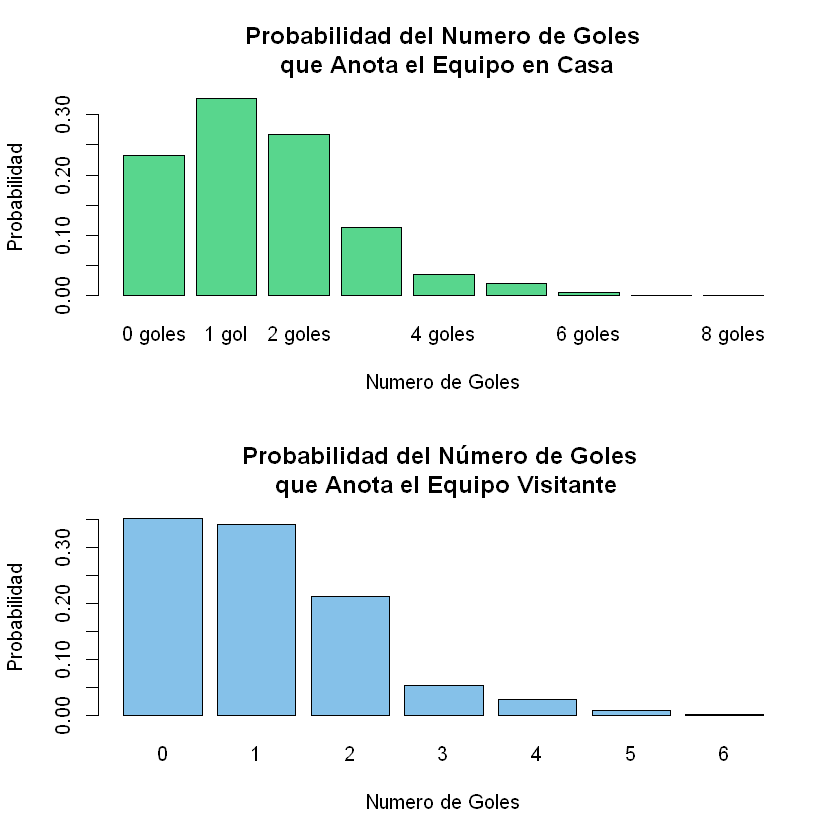

In [15]:
layout(matrix(c(1:2), nrow=2, byrow=FALSE))
barplot(ProbCasaLE, main = " Probabilidad del Numero de Goles \n que Anota el Equipo en Casa", 
     xlab = "Numero de Goles", ylab = "Probabilidad", col = "#58d68d")

barplot(prop.table(table(DatosLE$FTAG)), main = "Probabilidad del Número de Goles \n que Anota el Equipo Visitante", 
        xlab = "Numero de Goles", ylab = "Probabilidad", col = "#85c1e9")

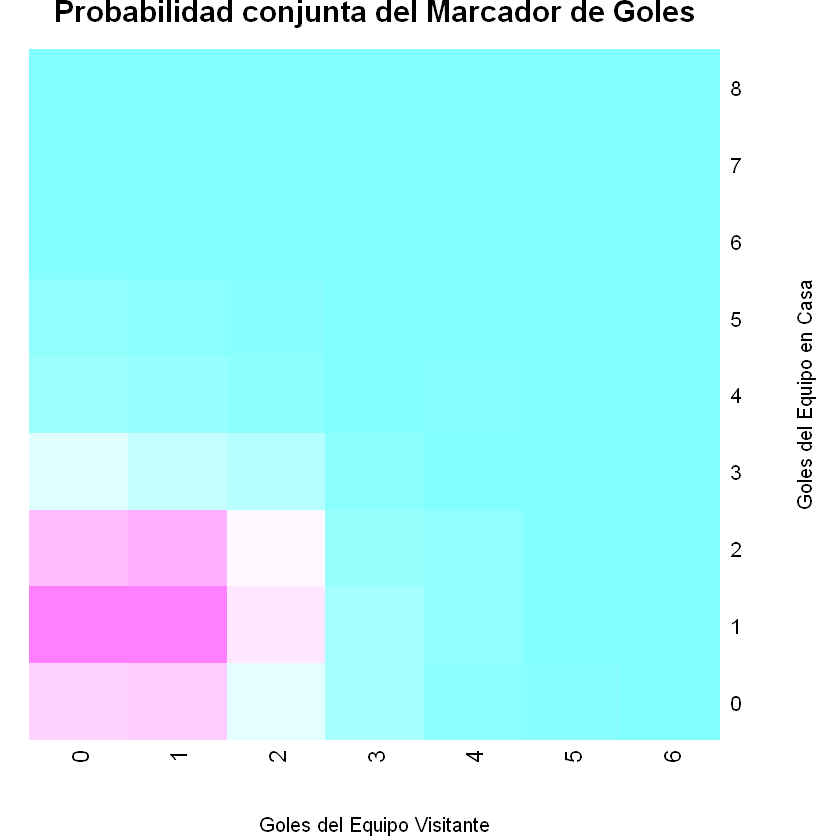

In [34]:
heatmap(ProbConjuntaLE,
        scale = "none",
        Rowv = NA, Colv = NA, 
        col = cm.colors(256),
        xlab="Goles del Equipo Visitante", ylab="Goles del Equipo en Casa",
        main = "Probabilidad conjunta del Marcador de Goles")

**Hallazgos:**
1. En las gráficas de probabilidad marginal se observa la tendencia mencionada en el postwork 1. La mayor parte de la probabilidad se concentra en anotar menos de tres goles. Existe una tendencia a anotar menos de tres goles que anotar más de tres.
2. En el mapa de calor se observa la concentración de probabilidad en el recuadro de 2x2 goles.

**Conclusión:**

La gráficas dan una mejor noción de los datos así como la relación entre las variables.


## Postwork 4 -  Algunas distribuciones, teorema central del límite y contraste de hipótesis

**Objetivo:** Investigar la dependencia o independecia de las variables aleatorias X y Y, el número de goles anotados por el equipo de casa y el número de goles anotados por el equipo visitante.

**Hipotesis:**

1. Si se realiza un muestreo se podría obtener una distribución normal
2. Si anotar goles son eventos independientes, las la distribución se centraría en 1 

**Preguntas clave:**
1. Si tenemos una distribución no centrada en 1 ¿Qué parametro nos ayuda a determinar si las variables son independientes?
2. ¿Cúantos remuestreos son suficientes para realizar la comprobación?

### Independencia de eventos

Dos eventos A y B son independientes si se puede escribir la probabilidad conjunta como multiplicación de la probabilidad marginal. $ P(A \cap B)= P(A)P(B) $. En este caso los eventos corresponde a los goles anotados por el equipo visitante y el equipo de casa.

Dado las probabilidades marginales y las proabilidades conjuntas se puede determinas si los eventos son independientes si se cumple 
$$ \frac{P(A \cap B)}{P(A)P(B)}=1$$

Dada la matriz resultante se obtiene la media para observar lo cercano a 1 que se encuentra el resultado.

### Bootstrap

Una distribución de muestreo describe la probabilidad de obtener cada valor posible de un estadístico de una muestra aleatoria de una población. Bootstrap es un método que estima la distribución de muestreo al tomar múltiples muestras con reemplazo de una sola muestra aleatoria. Estas nuevas muestras se denominan muestras repetidas. 


### Teorema del límite central
Establece que para una  muestra grande alguna población, la distribución de las medias muestrales es una distribución normal.

### Contraste de hipotesis

Las hipótesis se pueden comparar con la información de las muestras y al rechazar o aceptar la hipotesis se comete algún error. Se pretende rechazar la hipótesis nula (H0) y lo que implica aceptar una hipótesis alternativa (H1).

La hipotesis a verificar es las variables son independientes o no, lo que se escribe cómo $H_0: \mu=1$ y $H_1: \mu \neq 1$

1. Obtén una tabla de cocientes al dividir estas probabilidades conjuntas por el producto de las probabilidades marginales correspondientes.

In [17]:
#Multiplicación de las probabilidades marginales P(A)P(B)
ProductoProbMarg <- t(ProbVisitanteLE %*% t(ProbCasaLE))
#Cociente de la probabilidad conjunta entre la marginal
ProbCo <- round(ProbConjuntaLE/ ProductoProbMarg,5)
ProbCo

         
          0 goles   1 gol 2 goles 3 goles 4 goles 5 goles 6 goles
  0 goles 0.95478 1.02004 0.92437 1.45709 0.78216 1.95540 0.00000
  1 gol   1.00606 1.03190 0.98509 0.98590 0.92615 0.55569 0.00000
  2 goles 0.93516 1.03415 1.08471 0.78629 1.13636 0.68182 2.50000
  3 goles 1.13272 0.84931 1.03048 1.00554 0.53977 1.61932 2.96875
  4 goles 1.13716 0.88144 0.94215 0.00000 3.45455 0.00000 0.00000
  5 goles 1.29222 0.80131 1.07062 0.00000 1.57025 0.00000 0.00000
  6 goles 1.42145 0.97938 0.00000 3.06452 0.00000 0.00000 0.00000
  7 goles 0.00000 2.93814 0.00000 0.00000 0.00000 0.00000 0.00000
  8 goles 0.00000 0.00000 4.71074 0.00000 0.00000 0.00000 0.00000

In [18]:
#Promedio de la matriz
mean(ProbCo) 

[1] 0.8595705

2.Mediante un procedimiento de boostrap, obtén más cocientes similares a los obtenidos en la tabla del punto anterior. Esto para tener una idea de las distribuciones de la cual vienen los cocientes en la tabla anterior. Menciona en cuáles casos le parece razonable suponer que los cocientes de la tabla en el punto 1, son iguales a 1 (en tal caso tendríamos independencia de las variables aleatorias X y Y).

In [19]:
#Función que realiza el proceso de obtener las proabilidades marginales, conjunta y la división entre ellas. 
#Regresa como resultado el media dada una muestra

Comprobacion <- function(x,y){
    
    ProbConjunta <- prop.table(table(x,y))
    ProbMargX<- prop.table(apply(ProbConjunta,MARGIN = 1,sum))
    ProbMargY<- prop.table(apply(ProbConjunta,MARGIN = 2,sum))
    
    ProbCo <- ProbConjunta/t(ProbMargY %*% t(ProbMargX))
    
    return(round(mean(ProbCo),3))
}


In [20]:
#Semilla para el muestreo bootstraps
set.seed(33421)
Nmuestras <- 1000 # Número de muestras bootstrap
#muestras
DatosLE_boot <- bootstraps(DatosLE, times = Nmuestras)

In [21]:
#Obtiene un vector con las medias de la comprobación todas las muestras realizadas por el bootstrap
medias <- c()
for(i in 1:Nmuestras){
    muestra <- as.data.frame(DatosLE_boot$splits[[i]])
    med <- Comprobacion(muestra$FTAG,muestra$FTHG)
    medias <- c(medias,med)
}

In [22]:
print(paste("La media es",mean(medias),'y a desviación estandar es',sd(medias)))

[1] "La media es 0.89247 y a desviación estandar es 0.0712878184057631"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


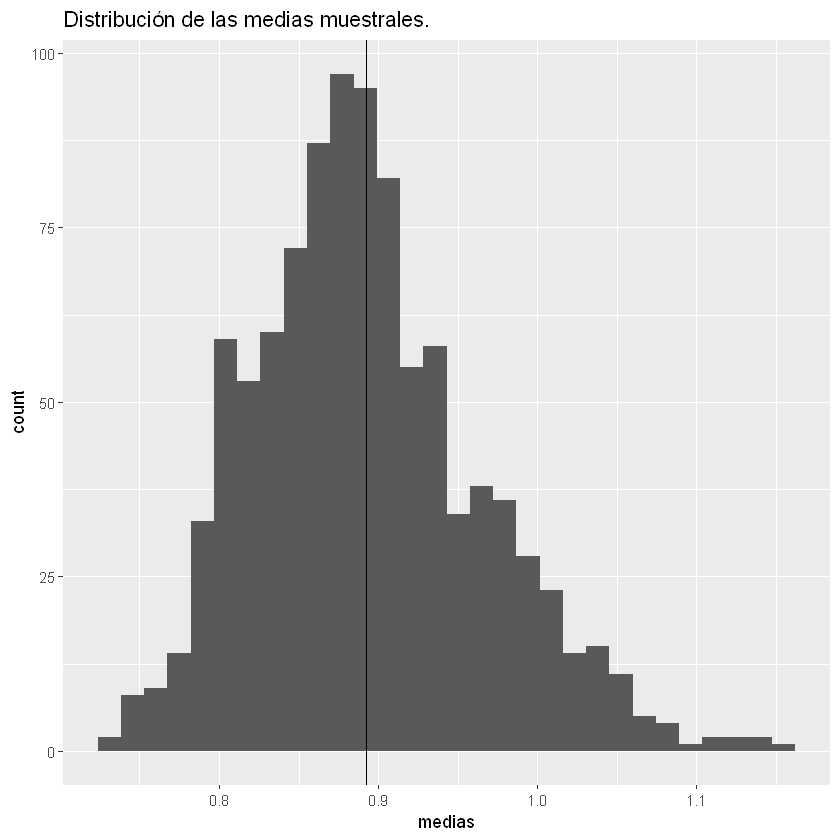

In [29]:
#Se gráfica la distribución de medias
ggplot() + 
  geom_histogram(aes(medias)) + 
  geom_vline(aes(xintercept = mean(medias))) +
  ggtitle('Distribución de las medias muestrales.')

In [31]:
t.test(medias, alternative='two.sided',
       conf.level=0.95, mu=1)


	One Sample t-test

data:  medias
t = -47.7, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.8880463 0.8968937
sample estimates:
mean of x 
  0.89247 


**Hallazgos:**
1. Se puede realizar el proceso resmuestreo con la función sample o bootstraps.

2. Se realizan diferentes muestreos, se aplicó el proceso de obtener las media de la comprobación y se observó que el resultado es una distribución normal

**Conclusiones:**

1. De acuerto al teorema de límite central la distribución de las medias es una distribución normal
2. La distribución se centra en 0.89247 con una varianza de 0.071. 
3.  p-value < 2.2e-16<0.05 por lo que se rechaza la hiporesis nula y por lo tanto no son independienes.

## Postwork 5 - Regresión lineal y clasificación
**Objetivo:** Realizar predicciones de los resultados de partidos para una fecha determinada y entender como una variable de respuesta está relacionada con varias variables explicativas.

**Hipotesis:** 
Entre más datos se incluyan, más precisas van a ser las predicciones finales. 

**Preguntas clave:**
1. Cuántos datos se necesitan incluir para tener una predicción certera?
2. ¿Cómo mejorar las predicciones?

1. A partir del conjunto de datos de soccer de la liga española de las temporadas 2017/2018, 2018/2019 y 2019/2020, crea el data frame SmallData, que contenga las columnas date, home.team, home.score, away.team y away.score; Con ayuda de la función write.csv guarda el data frame como un archivo csv con nombre soccer.csv. 

In [40]:
#Links de los datos a descargar
LinkT1718 <- "https://www.football-data.co.uk/mmz4281/1718/SP1.csv"
LinkT1819 <- "https://www.football-data.co.uk/mmz4281/1819/SP1.csv"
LinkT1920 <- "https://www.football-data.co.uk/mmz4281/1920/SP1.csv"

Links <- list(LinkT1718,LinkT1819,LinkT1920)

In [41]:
#Se crea un dataframe vacío para añadir los datos de interes
SmallData <- data.frame(date = character(),
                        home.team = character(),
                        home.score = numeric(),
                        away.team  = character(),
                       away.score = numeric())

In [42]:
#Se descarga cada csv, se añada al dataframe
for(i in 1:length(Links)){
     D <- read.csv(Links[[i]])
     N <- select(D, date = Date, home.team = HomeTeam,home.score = FTHG, away.team = AwayTeam, away.score = FTAG)
    SmallData <- rbind(SmallData,N)
    print(paste('Dimensión con',i,'fichero cargado:',dim(SmallData)[1]))
}

[1] "Dimensión con 1 fichero cargado: 380"
[1] "Dimensión con 2 fichero cargado: 760"
[1] "Dimensión con 3 fichero cargado: 1140"


In [43]:
#Se tranforma la columna date a tipo fecha
SmallData <- mutate(SmallData,date= as.Date(SmallData$date, format = "%d/%m/%y"))
str(SmallData)

'data.frame':	1140 obs. of  5 variables:
 $ date      : Date, format: "2017-08-18" "2017-08-18" ...
 $ home.team : Factor w/ 26 levels "Alaves","Ath Bilbao",..: 13 19 6 10 17 2 4 11 14 15 ...
 $ home.score: int  1 1 2 2 1 0 2 0 1 0 ...
 $ away.team : Factor w/ 26 levels "Alaves","Ath Bilbao",..: 1 12 18 3 8 9 5 16 20 7 ...
 $ away.score: int  0 0 3 2 1 0 0 3 0 1 ...


In [44]:
#Se guardan los datos en un csv
write.csv(SmallData, file="soccer.csv", row.names = FALSE)

2. Con la función create.fbRanks.dataframes del paquete fbRanks importe el archivo soccer.csv a R y al mismo tiempo asignelo a una variable llamada listasoccer. Se creará una lista con los elementos scores y teams que son data frames listos para la función rank.teams. Asigna estos data frames a variables llamadas anotaciones y equipos.

In [46]:
#Se cargarn los datos
listasoccer <- create.fbRanks.dataframes("soccer.csv")
str(listasoccer)

Alert: teams info file was not passed in.
Will construct one from the scores data frame but teams in the scores file must use a unique name.
Alert: teams resolver was not passed in.
Will construct one from the team info data frame.
List of 6
 $ scores       :'data.frame':	1140 obs. of  5 variables:
  ..$ date      : Date[1:1140], format: "2017-08-18" "2017-08-18" ...
  ..$ home.team : chr [1:1140] "Leganes" "Valencia" "Celta" "Girona" ...
  ..$ home.score: num [1:1140] 1 1 2 2 1 0 2 0 1 0 ...
  ..$ away.team : chr [1:1140] "Alaves" "Las Palmas" "Sociedad" "Ath Madrid" ...
  ..$ away.score: num [1:1140] 0 0 3 2 1 0 0 3 0 1 ...
 $ raw.scores   :'data.frame':	1140 obs. of  5 variables:
  ..$ date      : Date[1:1140], format: "2017-08-18" "2017-08-18" ...
  ..$ home.team : chr [1:1140] "Leganes" "Valencia" "Celta" "Girona" ...
  ..$ home.score: num [1:1140] 1 1 2 2 1 0 2 0 1 0 ...
  ..$ away.team : chr [1:1140] "Alaves" "Las Palmas" "Sociedad" "Ath Madrid" ...
  ..$ away.score: num [1:1140

In [47]:
#Se guardan los datos que utilizaremos para la predicción
anotaciones <- listasoccer$scores
equipos <- listasoccer$teams

3. Con ayuda de la función unique crea un vector de fechas (fecha) que no se repitan y que correspondan a las fechas en las que se jugaron partidos. Crea una variable llamada n que contenga el número de fechas diferentes. Posteriormente, con la función rank.teams y usando como argumentos los data frames anotaciones y equipos, crea un ranking de equipos usando únicamente datos desde la fecha inicial y hasta la penúltima fecha en la que se jugaron partidos, estas fechas las deberá especificar en max.date y min.date. Guarda los resultados con el nombre ranking.

In [51]:
#Se crea un vector de fechas
fechas <- unique(listasoccer$scores$date) #Ya están en orden
n <- length(fechas)
print(paste('Existen',n,'fechas diferentes'))

[1] "Existen 331 fechas diferentes"


In [54]:
#Se obtiene la primera y ultima fecha
rango <- fechas[c(1,n-1)]
print(paste('Existe una diferencia de',diff(rango), 'entre',fechas[1],'y',fechas[n-1]))

[1] "Existe una diferencia de 1222 entre 2017-08-18 y 2020-12-22"


In [55]:
#Se crea un ranking 
ranking <- rank.teams(scores=anotaciones, teams = equipos, max.date = rango[2], min.date = rango[1])


Team Rankings based on matches 2017-08-18 to 2020-12-22
   team        total attack defense n.games.Var1 n.games.Freq
1  Barcelona    1.53 2.24   1.29    Barcelona    114         
2  Ath Madrid   1.23 1.32   1.77    Ath Madrid   114         
3  Real Madrid  1.13 1.86   1.17    Real Madrid  114         
4  Valencia     0.54 1.33   1.10    Valencia     113         
5  Getafe       0.53 1.08   1.33    Getafe       114         
6  Granada      0.47 1.33   1.05    Granada       38         
7  Sevilla      0.44 1.36   0.99    Sevilla      113         
8  Villarreal   0.35 1.40   0.91    Villarreal   114         
9  Sociedad     0.32 1.38   0.90    Sociedad     114         
10 Ath Bilbao   0.10 1.01   1.06    Ath Bilbao   114         
11 Osasuna      0.06 1.19   0.88    Osasuna       38         
12 Betis        0.02 1.27   0.80    Betis        114         
13 Celta        0.01 1.24   0.81    Celta        114         
14 Levante     -0.01 1.26   0.79    Levante      113         
15 Eibar     

4. Finalmente estima las probabilidades de los eventos, el equipo de casa gana, el equipo visitante gana o el resultado es un empate para los partidos que se jugaron en la última fecha del vector de fechas fecha. Esto lo puedes hacer con ayuda de la función predict y usando como argumentos ranking y fecha[n] que deberá especificar en date

In [56]:
#Se hace una predicción de la ultima fecha
prediccion <- predict.fbRanks(ranking,date = fechas[n])

Predicted Match Results for 1900-05-01 to 2100-06-01
Model based on data from 2017-08-18 to 2020-12-22
---------------------------------------------
2020-12-23 Leganes vs Sevilla, HW 22%, AW 50%, T 27%, pred score 0.8-1.4  actual: T (1-1)
2020-12-23 Valencia vs Huesca, HW 57%, AW 20%, T 23%, pred score 1.8-1  actual: HW (2-1)
2020-12-23 Vallecano vs Levante, HW 26%, AW 52%, T 22%, pred score 1.3-1.9  actual: HW (2-1)


**Hallazgos:** 

1. La librería fbRanks utiliza el modelo de regresión de Poisson, el cual se usa para modelar datos de conteo. Es decir, el número de veces que ocurre cierto fenómeno aleatorio por unidad de tiempo, área o producto cuya probabilidad de ocurrencia es constante. 
2. Por medio de esta librería, es posible calcular la probabilidad de que gane el equipo local o el visitante, así como el marcador final. Esto se logra mediante un modelo de regresión que estima los ataques y defensas de los equipos. Utilizando estos datos, se hacen predicciones de probabilidad con base en qué tan verosímil es que en un equipo meta más goles que el otro por sus rankings de ataque y defensa.

**Conclusiones:**

Si bien la librería nos presenta la posibilidad de hacer predicciones sobre los resultados de los partidos, estos no siempre son 100% precisos. Es necesario aclarar que, como esta librería trabaja con funciones ‘glm’ (Generalized Linear Model), podrían existir otros modelos de mayor precisión si se utilizaran otros ajustes. De igual forma, al igual que en todos los modelos, disponer de una cantidad reducida de datos puede perjudicar la precisión de las predicciones ya que no habría suficientes elementos para identificar el ataque y la defensa de los equipos entre sí.

## Postwork 6 - Series de tiempo 
**Objetivo:** Crear y manejar series de tiempo en R para determinar patrones.

**Hipotesis:** El promedio de goles por mes y por año después de la grupación se mantiene dentro de un rango especifico.


**Preguntas clave:**
1. ¿Se cuenta con información de los eventos?
2. ¿Cuáles son las fechas en las que ocurren los eventos?
3. ¿Cómo se agrupan los datos?

Importa el conjunto de datos match.data.csv a R

In [57]:
#Se descargan los datos
LinkDatos <- 'https://raw.githubusercontent.com/beduExpert/Programacion-R-Santander-2021/main/Sesion-06/Postwork/match.data.csv'
DatosMatch <- read.csv(LinkDatos)

In [58]:
#Se cambia la columna date a tipo fecha
DatosMatch <- mutate(DatosMatch,date= as.Date(DatosMatch$date, format = "%Y-%m-%d") )

In [59]:
str(DatosMatch)

'data.frame':	3800 obs. of  5 variables:
 $ date      : Date, format: "2010-08-28" "2010-08-28" ...
 $ home.team : Factor w/ 33 levels "Alaves","Almeria",..: 15 20 21 11 17 22 23 25 27 4 ...
 $ home.score: int  0 1 1 3 0 0 0 0 1 4 ...
 $ away.team : Factor w/ 33 levels "Alaves","Almeria",..: 3 26 29 12 33 24 2 5 32 28 ...
 $ away.score: int  1 4 3 1 0 0 0 3 0 0 ...


1. Agrega una nueva columna sumagoles que contenga la suma de goles por partido.

In [60]:
#Se añada una columna con la suma de los goles anotados por los dos equipos
DatosMatch<- mutate(DatosMatch,total.goles=DatosMatch$home.score+DatosMatch$away.score)
head(DatosMatch)

date,home.team,home.score,away.team,away.score,total.goles
2010-08-28,Hercules,0,Ath Bilbao,1,1
2010-08-28,Levante,1,Sevilla,4,5
2010-08-28,Malaga,1,Valencia,3,4
2010-08-29,Espanol,3,Getafe,1,4
2010-08-29,La Coruna,0,Zaragoza,0,0
2010-08-29,Mallorca,0,Real Madrid,0,0


2. Obtén el promedio por mes de la suma de goles.

In [61]:
#Se hace una agrupación por año y mes
goles<- DatosMatch %>% 
  group_by( Yr =year(date),Mn = month(date)) %>% 
  summarise(mean = mean(total.goles))

`summarise()` has grouped output by 'Yr'. You can override using the `.groups` argument.


3. Crea la serie de tiempo del promedio por mes de la suma de goles hasta diciembre de 2019.

In [62]:
#Se crea una serie de tiempo
SerieGolM <- ts(goles, st= c(2010,8), end = c(2019,12), fr = 12)

4. Grafica la serie de tiempo.

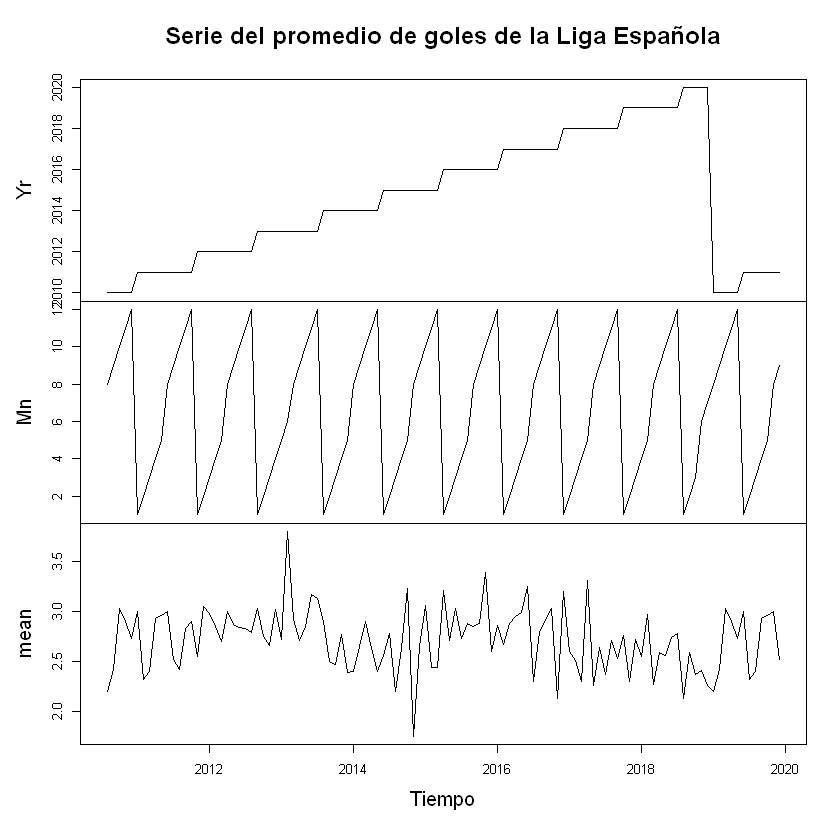

In [63]:
#Se gráfica la serie de tiempo
plot(SerieGolM, xlab = "Tiempo", ylab = "Promedio de goles", main = "Serie del promedio de goles de la Liga Española",
     sub = "Agrupación mensual: Agosto de 2010 a Diciembre de 2019")

**Hallazgos:**
1. Observamos en el dataset que la Liga Española se juega regularmente de agosto a mayo pero independientemente de la frecuencia con la funciones de lubridate, se obtenía la misma gráfica de la serie de tiempo si se toma 12 o 10 de frecuencia.
2. Por la gráfica de nuestra serie de tiempo, podemos inferir una media de goles por partido situada entre los 2 y 3 goles, durante los últimos 10 años de la liga

**Conclusiones:**

Gracias a las funciones group_by y summarise de la librería lubridate para R, al graficar la serie de tiempo, podemos observar la estacionalidad para los años y meses, y la variación del promedio de goles a lo largo del tiempo.


## PostWork 7 - RStudio Cloud - Github, conexiones con BDs y lectura de datos externos
**Objeivo:** Realizar el alojamiento de un fichero .csv a una base de datos (BDD), en un local host de Mongodb a través de R

**Hipotesis:**
La eficencia de las consultas se puede mejorar por medio de la conexión de una base de datos a través de un lenguaje de programación.

**Preguntas clave:**
1. ¿Qué se desea lograr con la conexión? Almacenar, descargar o consultar datos.
2. ¿Qué ventajas tiene?
3. ¿Qué información es requerida para la conexión?

Utilizando el manejador de BDD Mongodb Compass
1. Alojar el fichero match.data.csv en una base de datos llamada match_games, nombrando al collection como match

In [69]:
#Se hace una conexión con la base de datos
Bdconect <- mongo(collection='match',
           db='match_games',
           url = "",
           verbose = FALSE)

In [70]:
#Se descarga los datos
LinkM <-'https://raw.githubusercontent.com/beduExpert/Programacion-R-Santander-2021/main/Sesion-07/Postwork/match.data.csv'
DatosMATCH <-read.csv(LinkM)

In [71]:
#Se inserta los datos a la base de datos
Bdconect$insert(DatosMATCH)

2. Una vez hecho esto, realizar un count para conocer el número de registros que se tiene en la base


In [72]:
#Se cuentan el número de documentos
NDoc <- Bdconect$count('{}')

print(paste('Se guardaron',NDoc,'documentos'))

[1] "Se guardaron 3800 documentos"


3. Realiza una consulta utilizando la sintaxis de Mongodb en la base de datos, para conocer el número de goles que metió el Real Madrid el 20 de diciembre de 2015 y contra que equipo jugó, ¿perdió ó fue goleada?

In [73]:
#Se hace una consulta
consulta <- Bdconect$find(query = '{"date" : "2015-12-20", "home_team" : "Real Madrid" }')
print(consulta)
#Real madrid contra Vallecano y Ganó Real madrid 

        date   home_team home_score away_team away_score
1 2015-12-20 Real Madrid         10 Vallecano          2


4. Por último, no olvides cerrar la conexión con la BDD

In [74]:
#Se cierra la conexión
rm(Bdconect)

**Hallazgos:**
1. Se puede controlar de manera remota cada aspecto de la base de datos si se cuenta con los permisos.
2. Se puede seguir trabajando con las consultas con los tipos de datos de R. 

**Conclusiones:**

El manejo de las consultas con R nos brinda una facilidad en cuando al manejo de datos. Además es posible planetar procesos complejor o repetitivos desde el lenguaje de programación más alla de la interfaz grafica.

## Postwork 8 - Dashboards con Shiny - Entorno GUI
**Objetivo:** Observar el resultado de la toma de desiciones consecutivas, cuando estas se basan en datos históricos y generar dashboards que muestren información de análisis, ya sea en forma de tablas y gráficas.

**Hipotesis:**
La GUI puede mejorar la visualización de las datos una vez análizados.

**Preguntas clave:**
1. ¿Qué información se desea visualizar?
2. ¿La información es categotiza?
3. ¿Qué tipo de gráfica es mejor para eso datos?
4. ¿Cúantas ventanas y/o pestañas son suficientes?

Para este postwork genera un dashboard en un solo archivo app.R, para esto realiza lo siguiente:

1. Ejecuta el código momios.R
2. Almacena los gráficos resultantes en formato png
3. Crea un dashboard donde se muestren los resultados con 4 pestañas:
4. Una con las gráficas de barras, donde en el eje de las x se muestren los goles de local y visitante con un menu de selección, con una geometría de tipo barras además de hacer un facet_wrap con el equipo visitante
5. Realiza una pestaña donde agregues las imágenes de las gráficas del postwork 3
6. En otra pestaña coloca el data table del fichero match.data.csv
7. Por último en otra pestaña agrega las imágenes de las gráficas de los factores de ganancia mínimo y máximo

recuerda que si tienes problemas con el codificado guarda tu archivo app.R con la codificación UTF-8

### Diseño de la interfaz y dashboard body

In [ ]:
setwd("D:/Program Files/RStudio/TRY1/www")
pData<-read.csv("match.data.csv")
choiceV<- names(pData)

ui<- fluidPage(
    dashboardPage(
        dashboardHeader(title = "Postwork 8"),
        
        dashboardSidebar(
            
            sidebarMenu(
                
                menuItem("Data Table",tabName = "data_table", icon = icon("table")),
                menuItem("Postwork 3", tabName = "img",icon = icon("file-picture-o")),
                menuItem("Graficas de Barras", tabName = "Dashboard", icon = icon("dashboard")),
                menuItem("Frecuencias Relativas", tabName = "FR", icon = icon("file-picture-o"))
            )
        ),
        
        dashboardBody(
            tabItems(
                tabItem( tabName = "data_table",
                         fluidRow(
                             titlePanel(h5("Data Table")),
                             dataTableOutput("data_table")
                         )),
                tabItem(tabName = "img",
                        titlePanel(h5("Imagenes")),
                        img(src="PW31.png",
                                   height=400,
                                   width=400),
                        img(src="PW33.png",
                            height=400,
                            width=400)
                            ),
                tabItem(tabName = "Dashboard",
                        fluidRow(
                            titlePanel(h3("GrÃ¡ficos de barras")),
                            selectInput("x","Seleccionar variable X",
                                        choices = c(choiceV[3],choiceV[5])),
                            plotOutput("plot1", height = 400, width = 700)
                        )),
                tabItem(tabName = "FR",
                        titlePanel(h4("GrÃ¡ficos del cÃ³digo momios")),
                        img(src="MMS1.png", height=400, width=700),
                        img(src="MMS2.png", height=400, width=700))
                )
            )
        )
    )




## Server

In [ ]:
server<- function(input, output){
    output$data_table<-renderDataTable({pData},
                                       options=list(aLengthMenu=c(20,50,80),
                                                    iDisplayLength=10)
                                       )
    output$plot1<-renderPlot({
        x<-pData[,input$x]
        pData%>% ggplot(aes(x))+
            geom_bar()+
            facet_wrap("pData$away.team")+
            labs(x=input$x, y="goles")+
            ylim(0,100)
    })
    
}
shinyApp(ui,server)

**Hallazgos:**
El despliegue del conjunto de datos y gráficas, permite tener un mayor entendimiento de la probabilidad de que ocurran diversos eventos relacionados al puntaje de cada equipo. La base de datos utilizada, incluye información sobre los partidos jugados en diversos años por diferentes equipos de la liga española, que contiene la fecha y los goles por equipo. 

En la sección 1, se muestra la probabilidad que existe de que cada equipo anote cierta cantidad de goles, además de la posibilidad de ganar, perder o empatar, con el equipo contrario. En la sección 2 se muestra, por medio de gráficas de barras, la probabilidad marginal que existe de que el equipo de casa o invitado meta cierta cantidad de goles, además de un heatmap que muestra la probabilidad conjunta del número de goles que anota el equipo de casa y el equipo visitante.

La sección 3, muestra la tabla de datos en la que están basados los gráficos anteriores, con la posibilidad de consultar o filtrar los mismos. Y la última sección contiene las gráficas de momios que permiten conocer la ganancia de una apuesta acertada respecto a los resultados de los partidos de fútbol. De esta manera, se obtiene una perspectiva amplia sobre los posibles resultados de los juegos de fútbol de la liga española. 


**Conclusiones:**

En la realización del último postwork se encontraron dificultades en la agrupación de datos para su graficación, donde la consulta de trabajos anteriores aportó ideas para terminar el mismo. Por otra parte, se discutió la mejor opción de diseño para la app con shiny y las funcionalidades que la interfaz podía tener. Finalmente, se concluyó que el uso de apps permite una visualización amigable e interactiva para el usuario, permitiendo la consulta y utilización de datos y gráficos, sin que este tenga acceso al código o necesite conocer el lenguaje.

## Notas adicionales

Si no tienes instaladas las librerias usa los siguientes comandos

In [ ]:
#install.packages("ggplot2")
#install.packages("dplyr")
#install.packages("rsample")
#install.packages('fbRanks')
#install.packages("lubridate")
#install.packages("mongolite")
#install.packages("shiny")         
#install.packages("class")           
#install.packages("stringr")         
#install.packages("shinydashboard") 